<a href="https://colab.research.google.com/github/marisbotero/Holi_pyladies/blob/master/Analisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **💚Análisis de datos con python y Google colab🌸**

1. Introducción

El Titanic es uno de los barcos más famosos de la historia, conocido principalmente por su trágico hundimiento en 1912. En este análisis, exploraremos datos relacionados con los pasajeros del Titanic, con el objetivo de entender mejor su distribución por género, edad, clase de billete, entre otros factores.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


2. Carga de Datos

Empezamos por cargar los datos del Titanic, que contienen información detallada sobre los pasajeros, incluyendo características personales y detalles del viaje.

In [2]:
titanic = sns.load_dataset('titanic')


3. Vista Inicial

Al observar las primeras filas del conjunto de datos, podemos ver información como la clase del billete, sexo, edad, tarifa pagada y si la persona sobrevivió o no.

In [3]:
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


4. Estadísticas Descriptivas

Para tener una mejor idea de nuestros datos, observamos estadísticas generales como promedios, mínimos y máximos. Por ejemplo, la edad promedio de los pasajeros, la tarifa máxima pagada, entre otros.

In [4]:
# Estadísticas generales
titanic.describe()



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Estadísticas por género
titanic.groupby('sex').describe()

survived                                              pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0  577.0  2.389948   

        ... parch        fare                                               \
        ...   75%  max  count       mean        std   min        25%   50%   
sex     ...                                                                  
female  ...   1.0  6.0  314.0  44.479818  57.997698  6.75  12.071875  23.0   
male    ...   0.0  5.0  577.0  25.523893  43.138263  0.00   7.895800  10.5   

                         
          75%       max  
sex                      
female  55.00  512.3292  
male    26.55  512.3292  

[2 rows x 48 columns]

5. Análisis Visual

a) Distribución de Edad: La siguiente gráfica muestra la distribución de edades de los pasajeros. La mayoría de ellos tenía entre 20 y 40 años.

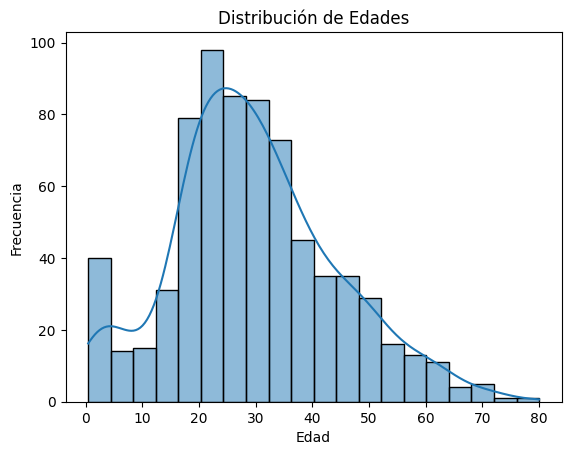

In [6]:
sns.histplot(titanic['age'].dropna(), bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


- Gráfica: Histograma

- Qué muestra: La gráfica muestra la distribución de edades de los pasajeros del Titanic.

- Explicación: En el eje X se encuentran las edades y en el eje Y, el número de pasajeros. Cada barra representa un rango de edad y su altura indica cuántos pasajeros estaban en ese rango. La línea suave (denominada KDE o estimación de densidad del kernel) nos da una visión continua de la distribución.

- Conclusión: La mayoría de los pasajeros tenía entre 20 y 40 años. Es decir, eran predominantemente adultos jóvenes.



b) Sobrevivientes por Género: Es interesante observar la tasa de supervivencia entre hombres y mujeres. En la siguiente gráfica, podemos ver que las mujeres tuvieron una tasa de supervivencia significativamente mayor que los hombres.

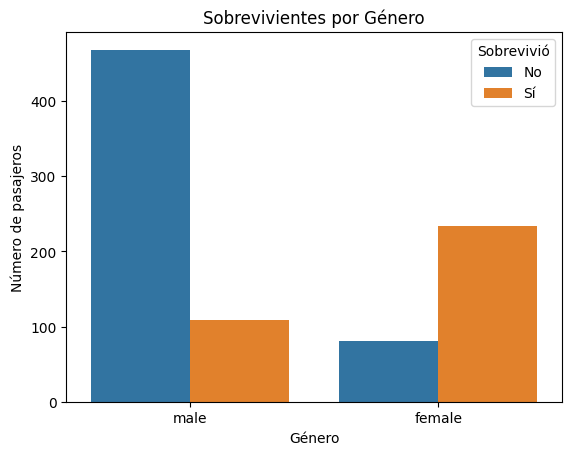

In [7]:
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title('Sobrevivientes por Género')
plt.xlabel('Género')
plt.ylabel('Número de pasajeros')
plt.legend(title='Sobrevivió', labels=['No', 'Sí'])
plt.show()


- Gráfica: Diagrama de barras agrupado

- Qué muestra: La gráfica compara el número de hombres y mujeres que sobrevivieron y que no sobrevivieron.

- Explicación: En el eje X se encuentran los géneros (masculino y femenino), y en el eje Y, el número de pasajeros. Las barras azules representan a quienes no sobrevivieron, mientras que las barras naranjas representan a quienes sí lo hicieron.

- Conclusión: A simple vista, se puede ver que la tasa de supervivencia entre las mujeres fue significativamente mayor que entre los hombres. Esto podría estar relacionado con la política de "mujeres y niños primero" en las embarcaciones de rescate.



c) Tarifa por Clase: La siguiente gráfica muestra la relación entre la clase del billete y la tarifa pagada, evidenciando que las tarifas más altas corresponden a la primera clase.

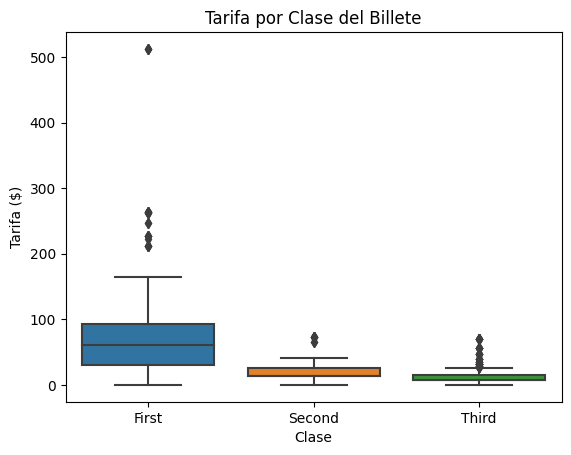

In [8]:
sns.boxplot(x='class', y='fare', data=titanic)
plt.title('Tarifa por Clase del Billete')
plt.xlabel('Clase')
plt.ylabel('Tarifa ($)')
plt.show()


- Gráfica: Diagrama de caja (boxplot)

- Qué muestra: La gráfica compara las tarifas pagadas por los pasajeros en función de la clase de su billete.

- Explicación: En el eje X se encuentran las clases de billete (Primera, Segunda y Tercera clase) y en el eje Y, la tarifa pagada. Cada "caja" representa el rango intercuartílico (desde el primer cuartil al tercer cuartil) de las tarifas pagadas por los pasajeros de esa clase. La línea dentro de la caja es la mediana. Los puntos fuera de las "antenas" del boxplot se consideran valores atípicos o outliers.

- Conclusión: Existe una clara diferencia en las tarifas pagadas entre las diferentes clases de billetes. Los pasajeros de primera clase pagaron significativamente más que los de segunda y tercera clase. También se observan varios outliers, especialmente en la primera clase, lo que indica que algunos pasajeros pagaron tarifas excepcionalmente altas.



 d)  punto de embarque y supervivencia

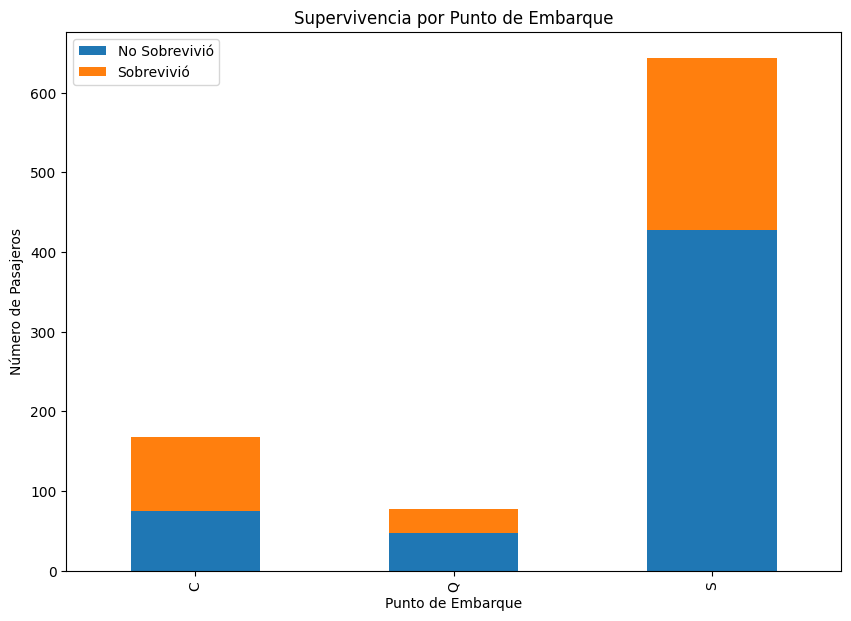

In [9]:
# Agrupar por punto de embarque y supervivencia
embarked_survival = titanic.groupby(['embarked', 'survived']).size().unstack()

# Gráfica
embarked_survival.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Supervivencia por Punto de Embarque')
plt.xlabel('Punto de Embarque')
plt.ylabel('Número de Pasajeros')
plt.legend(["No Sobrevivió", "Sobrevivió"])
plt.show()

 Este gráfico muestra el número de pasajeros que sobrevivieron o no, agrupados por su puerto de embarque. Esto puede ayudarnos a ver si hay alguna relación entre el puerto de embarque y las tasas de supervivencia.

e) Relación edad y tarifa

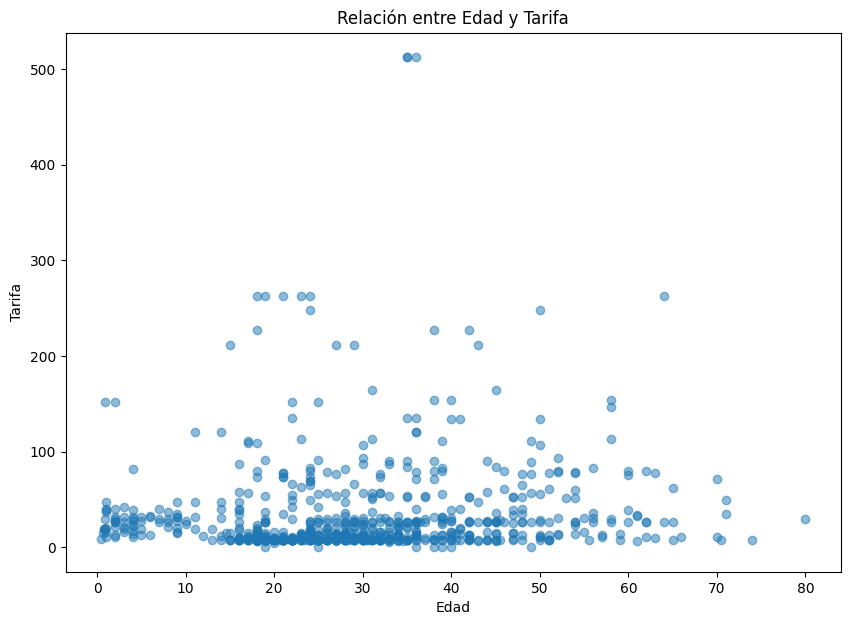

In [10]:
# Gráfica de dispersión
plt.figure(figsize=(10,7))
plt.scatter(titanic['age'], titanic['fare'], alpha=0.5)
plt.title('Relación entre Edad y Tarifa')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()


 Este gráfico de dispersión muestra la relación entre la edad y la tarifa pagada por cada pasajero. Cada punto representa a un pasajero. Aunque no se espera una correlación directa, este gráfico nos puede dar información sobre si ciertos grupos de edad tendían a pagar más o menos que otros.

f) Tasa de supervivencia según si viajaban solos o acompañados

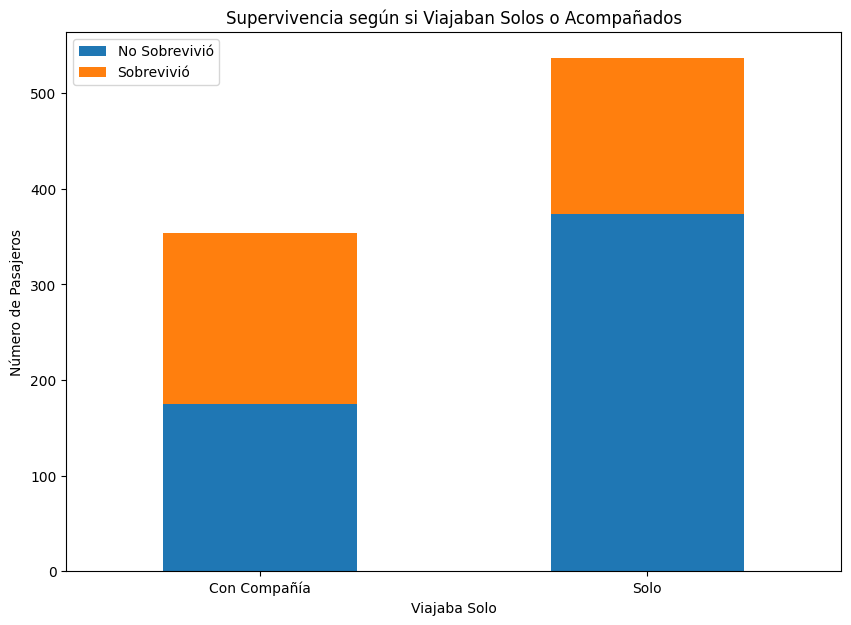

In [11]:
# Crear una nueva columna para identificar si el pasajero viajaba solo o acompañado
titanic['is_alone'] = (titanic['sibsp'] + titanic['parch']) == 0

# Agrupar por 'is_alone' y 'survived'
alone_survival = titanic.groupby(['is_alone', 'survived']).size().unstack()

# Gráfica
alone_survival.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Supervivencia según si Viajaban Solos o Acompañados')
plt.xlabel('Viajaba Solo')
plt.ylabel('Número de Pasajeros')
plt.xticks(ticks=[0, 1], labels=['Con Compañía', 'Solo'], rotation=0)
plt.legend(["No Sobrevivió", "Sobrevivió"])
plt.show()


Esta gráfica muestra la tasa de supervivencia de los pasajeros en función de si viajaban solos o acompañados (ya sea por familiares o cónyuges). Nos ayuda a entender si viajar solo o con compañía tenía alguna influencia en la posibilidad de sobrevivir al desastre.